In [18]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
import os as os

In [81]:
def preprocess_image(image):
    frame = cv2.resize(image, (640, 640))
    p1 = (50, 55)
    p2 = (60, 595)
    p3 = (555, 30)
    p4 = (605, 565)
    
    # Points to be transformed
    pts1 = np.float32([p1, p2, p3, p4])
    pts2 = np.float32([[0, 0], [0, 640], [640, 0], [640, 640]])
    matrix = cv2.getPerspectiveTransform(pts1, pts2)
    transformed_img = cv2.warpPerspective(frame, matrix, (640, 640))
    
    # Convert to grayscale and apply Gaussian blur
    gray = cv2.cvtColor(transformed_img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    return blurred

def detect_chessboard(image):
    # Since the image is already preprocessed and perspective-corrected,
    # we can assume the entire image is the chessboard
    height, width = image.shape
    return np.array([[0, 0], [width, 0], [width, height], [0, height]], dtype=np.int32)

def extract_chessboard(image, contour):
    # The entire image is now the chessboard, so we return it as is
    return image

def segment_board(chessboard):
    # Divide the chessboard into 64 squares
    height, width = chessboard.shape
    square_h, square_w = height // 8, width // 8
    squares = []
    for i in range(8):
        for j in range(8):
            square = chessboard[i*square_h:(i+1)*square_h, j*square_w:(j+1)*square_w]
            squares.append(square)
    return squares

def compare_squares(square1, square2):
    # Compare squares using Structural Similarity Index (SSIM)
    return ssim(square1, square2)

def coordinate_to_chess_notation(row, col):
    columns = 'abcdefgh'
    return f"{columns[col]}{8-row}"


def detect_changes(image1, image2, threshold=0.8):
    # Preprocess images
    prep1 = preprocess_image(image1)
    prep2 = preprocess_image(image2)
    
    # The entire preprocessed image is now the chessboard
    board1 = prep1
    board2 = prep2
    
    # Segment boards into squares
    squares1 = segment_board(board1)
    squares2 = segment_board(board2)
    
    # Compare corresponding squares
    changes = []
    for i in range(64):
        similarity = compare_squares(squares1[i], squares2[i])
        if similarity < threshold:
            row, col = i // 8, i % 8
            changes.append(coordinate_to_chess_notation(row, col))
    plt.imshow(prep1)
    
    return bool(changes), changes

Detected changes at squares: (True, ['f3', 'e2'])


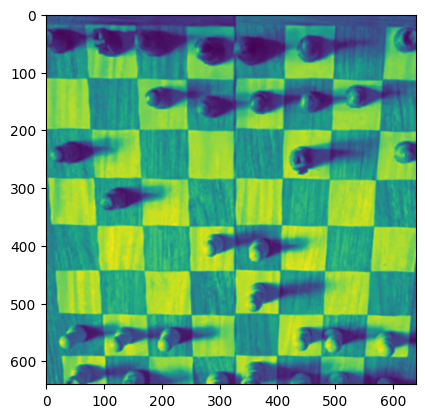

In [82]:
# Example usage
image1 = cv2.imread('frame_0131.jpg')
image2 = cv2.imread('frame_0132.jpg')
changes = detect_changes(image1, image2)
print(f"Detected changes at squares: {changes}")

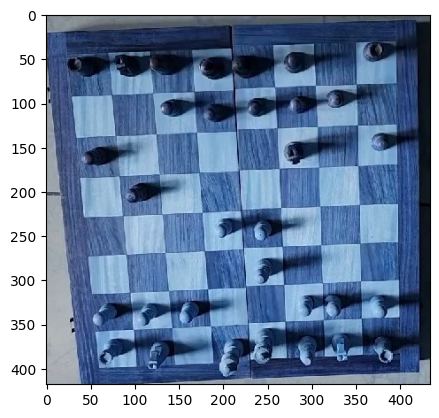

In [70]:
plt.imshow(image1)

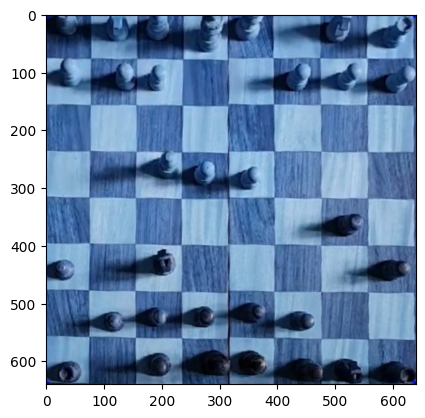

In [63]:
live_img = cv2.imread('frame_0132.jpg')
frame= cv2.resize(live_img,(640,640))
p1= (50,55)
p2= (60,595)
p3= (555,30)
p4= (605,565)
cv2.circle(frame,p1,5,(0,0,255),-1)
cv2.circle(frame,p2,5,(0,0,255),-1)
cv2.circle(frame,p3,5,(0,0,255),-1)
cv2.circle(frame,p4,5,(0,0,255),-1)
# points to be transformed
pts1= np.float32([p1,p2,p3,p4])
pts2= np.float32([[0,0],[0,640],[640,0],[640,640]])
matrix = cv2.getPerspectiveTransform(pts1,pts2)
transformed_img=cv2.warpPerspective(frame, matrix,(640,640))
plt.imshow(transformed_img)

In [71]:
plt.imshow(blurred)

NameError: name 'blurred' is not defined